In [1064]:
from data_loader import load_latest_iteration, load_all_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1065]:
bbpgd_data = load_all_files(
    f"../code/cpp/build/src/logs/data", "bbpgdtrace")

{'bbpgdtrace': {91: {0: 'bbpgdtrace_0000091_rank_0000.vtu'}, 272: {0: 'bbpgdtrace_0000272_rank_0000.vtu'}, 558: {0: 'bbpgdtrace_0000558_rank_0000.vtu'}, 417: {0: 'bbpgdtrace_0000417_rank_0000.vtu'}, 575: {0: 'bbpgdtrace_0000575_rank_0000.vtu'}, 58: {0: 'bbpgdtrace_0000058_rank_0000.vtu'}, 446: {0: 'bbpgdtrace_0000446_rank_0000.vtu'}, 595: {0: 'bbpgdtrace_0000595_rank_0000.vtu'}, 1035: {0: 'bbpgdtrace_0001035_rank_0000.vtu'}, 621: {0: 'bbpgdtrace_0000621_rank_0000.vtu'}, 946: {0: 'bbpgdtrace_0000946_rank_0000.vtu'}, 204: {0: 'bbpgdtrace_0000204_rank_0000.vtu'}, 228: {0: 'bbpgdtrace_0000228_rank_0000.vtu'}, 131: {0: 'bbpgdtrace_0000131_rank_0000.vtu'}, 168: {0: 'bbpgdtrace_0000168_rank_0000.vtu'}, 134: {0: 'bbpgdtrace_0000134_rank_0000.vtu'}, 841: {0: 'bbpgdtrace_0000841_rank_0000.vtu'}, 364: {0: 'bbpgdtrace_0000364_rank_0000.vtu'}, 1023: {0: 'bbpgdtrace_0001023_rank_0000.vtu'}, 278: {0: 'bbpgdtrace_0000278_rank_0000.vtu'}, 420: {0: 'bbpgdtrace_0000420_rank_0000.vtu'}, 851: {0: 'bbpgdtra

In [1066]:
bbpgd_data["iteration"] = bbpgd_data["iteration"] - 1

In [1067]:
import pandas as pd

# Create synthetic row
extra_row = pd.DataFrame([{
    'iteration': -1,
    'total_constraints': 0
}])

# Make sure other columns exist so Seaborn doesn’t complain
for col in bbpgd_data.columns:
    if col not in extra_row.columns:
        extra_row[col] = None

# Concatenate and sort by iteration
bbpgd_data_extended = pd.concat(
    [extra_row, bbpgd_data], ignore_index=True).sort_values('iteration')

/tmp/ipykernel_515023/3742320708.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bbpgd_data_extended = pd.concat(


In [1068]:
bbpgd_data = bbpgd_data_extended

In [1069]:
import seaborn as sns

tolerance = 1e-3


def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
             xscale=None, yscale=None,
             **kwargs):

    fig, ax = plt.subplots(figsize=(10, 6))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 ax=ax, **kwargs, lw=2, ms=10, color="purple", palette=("purple",), legend=True, label=ylabel)

    if xscale:
        ax.set_xscale(xscale)
    if yscale:
        ax.set_yscale(yscale)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True)
    # ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")

    return fig, ax

/tmp/ipykernel_515023/2706966494.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, x=x,                 y=y,


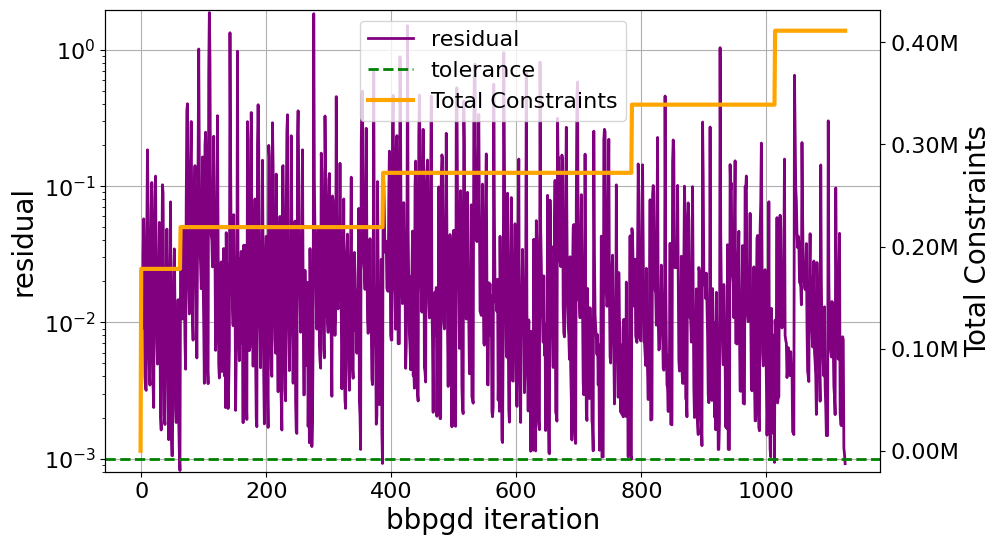

In [1070]:
# Create main plot
import matplotlib.ticker as mticker
fig, ax = makeplot(bbpgd_data, x='iteration', y='residual',
                   xlabel='bbpgd iteration',
                   ylabel='residual', outname='bbpgd_residual.png')

ax.set_ylim(8e-4, None)
ax.set_yscale('log')

# Add tolerance line
ax.axhline(y=tolerance, color='green', linestyle='--',
           label='tolerance', linewidth=2)

ax2 = ax.twinx()
sns.lineplot(data=bbpgd_data, x='iteration', y='total_constraints',
             ax=ax2, color='orange', lw=3, label='Total Constraints')
ax2.set_ylabel('Total Constraints', fontsize=20)
ax2.tick_params(axis='y', labelsize=16)


def millions_formatter(x, pos):
    # 1 decimal place in millions
    return f'{x / 1e6:.2f}M'


ax2.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: millions_formatter(x, pos)))


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels() if 'ax2' in locals() else ([], [])
ax.get_legend().remove()
ax2.get_legend().remove()
ax.legend(lines + lines2, labels + labels2, fontsize=16, loc='upper center')

fig.savefig('bbpgd_residual.png', dpi=300, bbox_inches="tight")

/tmp/ipykernel_515023/2706966494.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, x=x,                 y=y,


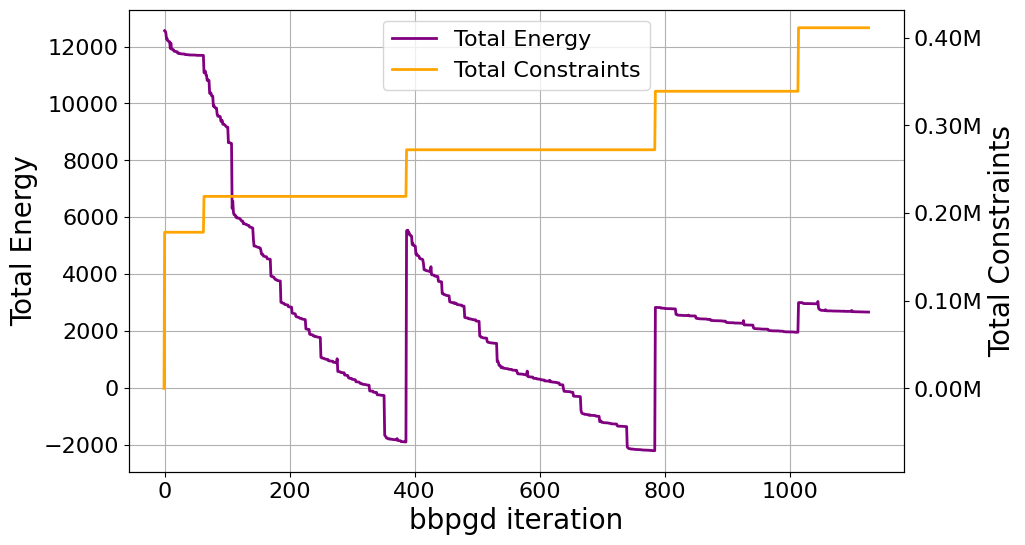

In [1093]:
# Create main plot
fig, ax = makeplot(bbpgd_data, x='iteration', y='total',
                   xlabel='bbpgd iteration',
                   ylabel='Total Energy', outname='bbpgd_total_energy.png')


ax2 = ax.twinx()
sns.lineplot(data=bbpgd_data, x='iteration', y='total_constraints',
             ax=ax2, color='orange', lw=2, label='Total Constraints')
ax2.set_ylabel('Total Constraints', fontsize=20)
ax2.tick_params(axis='y', labelsize=16)


ax2.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: millions_formatter(x, pos)))

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels() if 'ax2' in locals() else ([], [])
ax.get_legend().remove()
ax2.get_legend().remove()
ax.legend(lines + lines2, labels + labels2, fontsize=16, loc='upper center')

ax2.set_ylim(- 0.21 * np.ptp(ax2.get_ylim()),
             None)

fig.savefig('bbpgd_total_energy.png', dpi=300, bbox_inches="tight")